# Import needed packages

In [1]:
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 0s (213 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from openslide import open_slide, __library_version__ as openslide_version
import os
from PIL import Image
from skimage.color import rgb2gray

In [ ]:
import random
import cv2
import shutil
import os
import pandas as pd
import time

In [ ]:
from sklearn.utils import shuffle

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model, Sequential

# Build model with only one zoom level and try data augmentation

In the prepocessing part, I have already spilt the train and validation dataset for this kind of model. So steps of this will be skipped.

Besides, to make different models more comparable with each other, I will try to keep these models as similar as possible.

In [ ]:
! unzip -q "/content/drive/MyDrive/test.zip" -d "/content/test"

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

I will move the ".ipynb_checkpoints" files, or after applying the data generator, data will belong to three different class.

In [ ]:
os.listdir("/content/test/") 
shutil.rmtree("/content/test/train/.ipynb_checkpoints")
shutil.rmtree("/content/test/validation/.ipynb_checkpoints") 

In [ ]:
train_dir = '/content/test/train'
validation_dir = '/content/test/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

Found 8554 images belonging to 2 classes.
Found 2144 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 150, 150, 3)
labels batch shape: (128,)


## Without data augmentation

In [ ]:
history = model.fit_generator(
      train_generator,
      epochs=10,
      validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
67/67 [==============================] - 340s 5s/step - loss: 0.5558 - accuracy: 0.6812 - val_loss: 0.3874 - val_accuracy: 0.8316
Epoch 2/10
67/67 [==============================] - 337s 5s/step - loss: 0.3716 - accuracy: 0.8455 - val_loss: 0.3358 - val_accuracy: 0.8573
Epoch 3/10
67/67 [==============================] - 337s 5s/step - loss: 0.3133 - accuracy: 0.8661 - val_loss: 0.3595 - val_accuracy: 0.8531
Epoch 4/10
67/67 [==============================] - 337s 5s/step - loss: 0.3070 - accuracy: 0.8700 - val_loss: 0.2867 - val_accuracy: 0.8755
Epoch 5/10
67/67 [==============================] - 337s 5s/step - loss: 0.2788 - accuracy: 0.8848 - val_loss: 0.2823 - val_accuracy: 0.8843
Epoch 6/10
67/67 [==============================] - 338s 5s/step - loss: 0.2675 - accuracy: 0.8925 - val_loss: 0.2336 - val_accuracy: 0.9021
Epoch 7/10
67/67 [==============================] - 338s 5s/step - loss: 0.2310 - accuracy: 0.9076 - val_loss: 0.2671 - val_accuracy: 0.8941
Epoch 8/10
67

In [ ]:
#save the model
model.save('/content/drive/MyDrive/project_model/original_without_data_augmentation.h5')

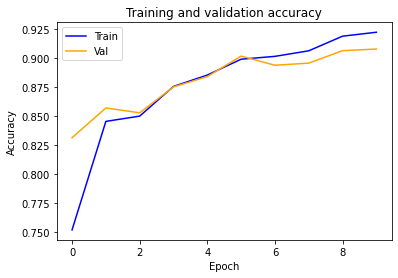

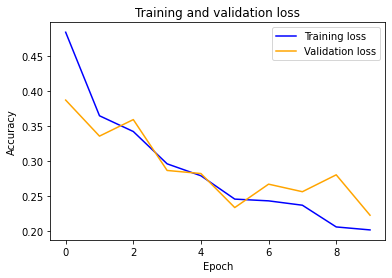

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.title('Training and validation loss')
plt.plot(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, color='orange', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Data augmentation

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')


Found 8554 images belonging to 2 classes.
Found 2144 images belonging to 2 classes.


Fit the model again and see if there is any improvement

In [ ]:
history = model.fit_generator(
      train_generator,
      epochs=10,
      validation_data=validation_generator,)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
67/67 [==============================] - 374s 6s/step - loss: 0.2417 - accuracy: 0.9029 - val_loss: 0.2110 - val_accuracy: 0.9151
Epoch 2/10
67/67 [==============================] - 372s 6s/step - loss: 0.2346 - accuracy: 0.9039 - val_loss: 0.2215 - val_accuracy: 0.9081
Epoch 3/10
67/67 [==============================] - 372s 6s/step - loss: 0.2267 - accuracy: 0.9116 - val_loss: 0.2025 - val_accuracy: 0.9188
Epoch 4/10
67/67 [==============================] - 372s 6s/step - loss: 0.2354 - accuracy: 0.9025 - val_loss: 0.2074 - val_accuracy: 0.9188
Epoch 5/10
67/67 [==============================] - 372s 6s/step - loss: 0.2184 - accuracy: 0.9100 - val_loss: 0.2748 - val_accuracy: 0.8871
Epoch 6/10
67/67 [==============================] - 372s 6s/step - loss: 0.2172 - accuracy: 0.9115 - val_loss: 0.2143 - val_accuracy: 0.9109
Epoch 7/10
67/67 [==============================] - 371s 6s/step - loss: 0.2151 - accuracy: 0.9130 - val_loss: 0.2337 - val_accuracy: 0.9025
Epoch 8/10
67

In [ ]:
#save the model
model.save('/content/drive/MyDrive/project_model/original_with_data_augmentation.h5')

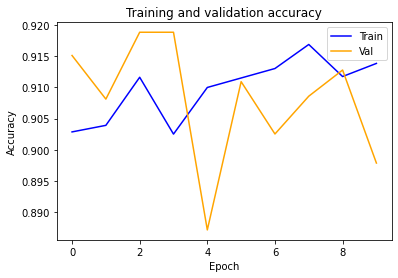

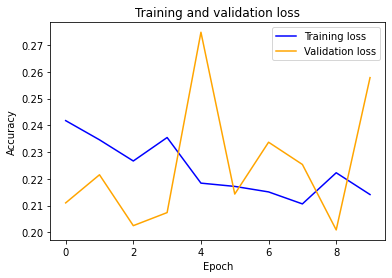

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.title('Training and validation loss')
plt.plot(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, color='orange', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Based on the plot, using data augmentation helps improve the accuracy a bit. However, it dose not improve a lot. So in the later part, I will not use data augmentaion but try to keep these models are similar to each other.

# Build model with different zoom levels

Here I will try two different models. 

In the first one, I just directly put samples with different zoom levels together and train them.

In the secondo one, I tried to do something like in the paper combing different zoom levels after training them seperately.


### Data preprocessing

In [ ]:
! unzip -q "/content/drive/MyDrive/different.zip" -d "/content/different"

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128
SHUFFLE_SIZE = 1000
IMG_SIZE = 150

In [ ]:
paths = pd.read_csv('/content/drive/MyDrive/different.csv')

In [ ]:
paths = shuffle(paths)

In [ ]:
# Get the paths of images and labels for the second model
all_image_paths_2 = paths.zoom_level_2.tolist()
all_image_paths_3 = paths.zoom_level_3.tolist()

all_labels_2 = paths.tag_2.tolist()
all_labels_3 = paths.tag_3.tolist()

In [ ]:
# Get the paths of images and labels for the first model
all_image_paths = []
all_image_paths.extend(all_image_paths_2)
all_image_paths.extend(all_image_paths_3)

all_labels = []
all_labels.extend(all_labels_2)
all_labels.extend(all_labels_3)

In [ ]:
from sklearn.model_selection import train_test_split
train_paths, val_paths, train_labels, val_labels = train_test_split(all_image_paths, 
                                                                    all_labels,train_size=0.8)
train_paths_2, val_paths_2, train_labels_2, val_labels_2 = train_test_split(all_image_paths_2, 
                                                                            all_labels_2,
                                                                            train_size=0.8,
                                                                            shuffle=False)
train_paths_3, val_paths_3, train_labels_3, val_labels_3 = train_test_split(all_image_paths_3, 
                                                                            all_labels_3,
                                                                            train_size=0.8,
                                                                            shuffle=False)

In [ ]:
def load_and_preprocess_image(path):
  path = '/content/different/'+path
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
  img /= 255.0  # normalize pixels to 0,1
  return img

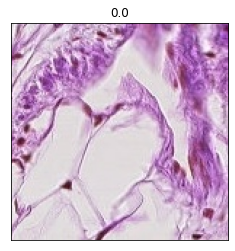

In [ ]:
def show(img, label):
  plt.imshow(img)
  plt.title(label)
  plt.xticks([])
  plt.yticks([])
  print()

img_path = train_paths[0]
img = load_and_preprocess_image(img_path)
label = train_labels[0]
show(img, label)

#### Build an input pipeline to return images and labels

In [ ]:
path_ds = tf.data.Dataset.from_tensor_slices(train_paths)
path_ds_2 = tf.data.Dataset.from_tensor_slices(train_paths_2)
path_ds_3 = tf.data.Dataset.from_tensor_slices(train_paths_3)
for n, img_path in enumerate(path_ds.take(4)):
  print(n, img_path)

0 tf.Tensor(b'078_2_1180_0.0.jpg', shape=(), dtype=string)
1 tf.Tensor(b'078_2_276_0.0.jpg', shape=(), dtype=string)
2 tf.Tensor(b'101_3_95_0.0.jpg', shape=(), dtype=string)
3 tf.Tensor(b'101_2_51_0.0.jpg', shape=(), dtype=string)


In [ ]:
# a dataset that returns images (loaded off disk, decoded, and preprocessed)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
image_ds_2 = path_ds_2.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
image_ds_3 = path_ds_3.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
for n, image in enumerate(image_ds.take(4)):
  print(n, image.shape)

0 (150, 150, 3)
1 (150, 150, 3)
2 (150, 150, 3)
3 (150, 150, 3)


In [ ]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(train_labels, tf.int64))
label_ds_2 = tf.data.Dataset.from_tensor_slices(tf.cast(train_labels_2, tf.int64))
label_ds_3 = tf.data.Dataset.from_tensor_slices(tf.cast(train_labels_3, tf.int64))
for label in label_ds.take(4):
  print(label.numpy())

0
0
0
0


In [ ]:
# a dataset that returns images and labels
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
image_label_ds_2 = tf.data.Dataset.zip((image_ds_2, label_ds_2))
image_label_ds_3 = tf.data.Dataset.zip((image_ds_3, label_ds_3))
print(image_label_ds)

<ZipDataset shapes: ((150, 150, 3), ()), types: (tf.float32, tf.int64)>


In [ ]:
for img, label in image_label_ds.take(2):
  print(img.shape, label.numpy())

(150, 150, 3) 0
(150, 150, 3) 0


In [ ]:
for img, label in image_label_ds_2.take(2):
  print(img.shape, label.numpy())

(150, 150, 3) 1
(150, 150, 3) 0


In [ ]:
for img, label in image_label_ds_3.take(2):
  print(img.shape, label.numpy())

(150, 150, 3) 1
(150, 150, 3) 0


#### Batch and shuffle

In [ ]:
ds = image_label_ds.shuffle(SHUFFLE_SIZE)
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

for img, label in ds.take(2):
  print(img.shape, label.shape) 

(128, 150, 150, 3) (128,)
(128, 150, 150, 3) (128,)


In [ ]:
ds_2 = image_label_ds_2.shuffle(SHUFFLE_SIZE)
ds_2 = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

for img, label in ds.take(2):
  print(img.shape, label.shape)

(128, 150, 150, 3) (128,)
(128, 150, 150, 3) (128,)


In [ ]:
ds_3 = image_label_ds_3.shuffle(SHUFFLE_SIZE)
ds_3 = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

for img, label in ds.take(2):
  print(img.shape, label.shape)

(128, 150, 150, 3) (128,)
(128, 150, 150, 3) (128,)


#### improvements

In [ ]:
train_ds = image_label_ds.cache()
train_ds = train_ds.shuffle(SHUFFLE_SIZE)
train_ds = train_ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

# make a validation dataset as well
path_ds = tf.data.Dataset.from_tensor_slices(val_paths)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(val_labels, tf.int64))
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
val_ds = image_label_ds.cache().batch(BATCH_SIZE)

In [ ]:
print(len(train_ds))
print(len(val_ds))

137
35


In [ ]:
train_diff_ds = tf.data.Dataset.zip((image_ds_2, label_ds_2,image_ds_3,label_ds_3))

train_diff_ds = train_diff_ds.cache()
train_diff_ds = train_diff_ds.shuffle(SHUFFLE_SIZE)
train_diff_ds = train_diff_ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

In [ ]:
path_ds_2 = tf.data.Dataset.from_tensor_slices(val_paths_2)
image_ds_2 = path_ds_2.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
label_ds_2 = tf.data.Dataset.from_tensor_slices(tf.cast(val_labels_2, tf.int64))

path_ds_3 = tf.data.Dataset.from_tensor_slices(val_paths_3)
image_ds_3 = path_ds_3.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
label_ds_3 = tf.data.Dataset.from_tensor_slices(tf.cast(val_labels_3, tf.int64))

In [ ]:
val_diff_ds = tf.data.Dataset.zip((image_ds_2, label_ds_2,image_ds_3,label_ds_3))

val_diff_ds = val_diff_ds.cache()
val_diff_ds = val_diff_ds.shuffle(SHUFFLE_SIZE)
val_diff_ds = val_diff_ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

In [ ]:
print(len(train_diff_ds))
print(len(val_diff_ds))

69
18


## First model



In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hisorty = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
137/137 [==============================] - 61s 196ms/step - loss: 0.5774 - accuracy: 0.6801 - val_loss: 0.3779 - val_accuracy: 0.8290
Epoch 2/10
137/137 [==============================] - 16s 115ms/step - loss: 0.3386 - accuracy: 0.8489 - val_loss: 0.2358 - val_accuracy: 0.8994
Epoch 3/10
137/137 [==============================] - 16s 116ms/step - loss: 0.2612 - accuracy: 0.8938 - val_loss: 0.1881 - val_accuracy: 0.9305
Epoch 4/10
137/137 [==============================] - 16s 116ms/step - loss: 0.2260 - accuracy: 0.9125 - val_loss: 0.1754 - val_accuracy: 0.9337
Epoch 5/10
137/137 [==============================] - 16s 115ms/step - loss: 0.1942 - accuracy: 0.9248 - val_loss: 0.1905 - val_accuracy: 0.9277
Epoch 6/10
137/137 [==============================] - 16s 115ms/step - loss: 0.1741 - accuracy: 0.9332 - val_loss: 0.1867 - val_accuracy: 0.9261
Epoch 7/10
137/137 [==============================] - 16s 115ms/step - loss: 0.1811 - accuracy: 0.9308 - val_loss: 0.2029 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/project_model/diffent_without_seperate.h5')

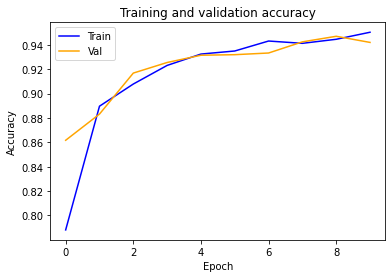

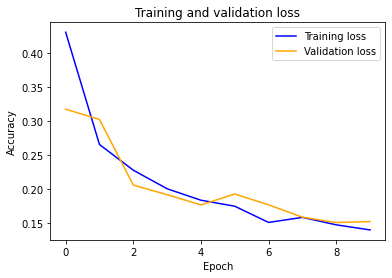

In [ ]:
acc = hisorty.history['accuracy']
val_acc = hisorty.history['val_accuracy']
loss = hisorty.history['loss']
val_loss = hisorty.history['val_loss']

epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.title('Training and validation loss')
plt.plot(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, color='orange', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Second model

Here the model is a bit different from what I have built before. The main reason is the limited RAM. If I keep the same as before, it will easily be crashed. So I just delete some layers to make it work more efficiently.

In [ ]:
image_input_2 = Input(shape=(150, 150, 3)) 
vision_model_2 = Sequential()
vision_model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
vision_model_2.add(layers.MaxPooling2D((2, 2)))
vision_model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
vision_model_2.add(layers.MaxPooling2D((2, 2)))
vision_model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
vision_model_2.add(layers.MaxPooling2D((2, 2)))
vision_model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
vision_model_2.add(layers.MaxPooling2D((2, 2)))
vision_model_2.add(layers.Flatten())
encoded_image_2 = vision_model_2(image_input_2) 


image_input_4 = Input(shape=(150, 150, 3)) 
vision_model_4 = Sequential()
vision_model_4.add(layers.Conv2D(32, (3, 3), activation='relu'))
vision_model_4.add(layers.MaxPooling2D((2, 2)))
vision_model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
vision_model_4.add(layers.MaxPooling2D((2, 2)))
vision_model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
vision_model_4.add(layers.MaxPooling2D((2, 2)))
vision_model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
vision_model_4.add(layers.MaxPooling2D((2, 2)))
vision_model_4.add(layers.Flatten())
encoded_image_4 = vision_model_4(image_input_4) 

merged = tf.keras.layers.concatenate([encoded_image_2, encoded_image_4])

dense_1 = Dense(128,activation='relu')(merged)
dense_2 = Dense(64,activation='relu')(dense_1)

output = Dense(1, activation='sigmoid')(dense_2)

# final model
model = Model(inputs=[image_input_2, image_input_4], outputs=output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 6272)         240832      input_1[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 6272)         240832      input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

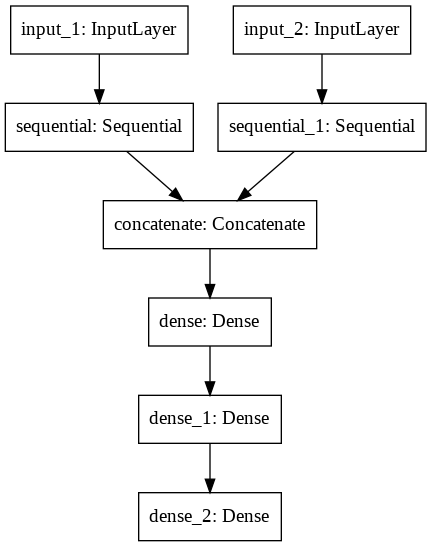

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
# You should not need to modify this.
def evaluate(max_steps=None):
  steps = 0
  for img_path_2, img_label_2, img_path_3, img_label_3 in val_diff_ds:
    if max_steps != None and steps == max_steps:
      break
    predictions = model.predict(x=[img_path_2, img_path_3])
    steps += 1 
    # Record metrics after each batch
    val_loss(img_label_3, predictions)
    val_accuracy(img_label_3, predictions)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

val_loss = tf.keras.metrics.BinaryCrossentropy(name='val_loss')
val_accuracy = tf.keras.metrics.BinaryAccuracy(name='val_accuracy')

In [ ]:

train_loss_history, train_acc_history = [], []
val_loss_history, val_acc_history = [], []

epochs = 10

# Training loop
for epoch in range(epochs):

  start = time.time()

  # Train for one epoch
  for img_path_2, img_label_2, img_path_3, img_label_3 in train_diff_ds:
    result = model.train_on_batch(x=[img_path_2, img_path_3], y=img_label_3)

    # Record metrics after each batch
    train_loss(result[0])
    train_accuracy(result[1])

  # Evaluate for a few steps
  evaluate(max_steps=100)

  # Print progress
  # You should not need to modify this.
  template = 'Epoch {}, Loss: {:.2f}, Accuracy: {:.2f}, Val Loss {:.2f}, Val Accuracy {:.2f}, Time: {:.1f} secs'
  print(template.format(epoch,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        val_loss.result(),
                        val_accuracy.result() * 100,
                        time.time() - start))
  
  # Record history
  train_loss_history.append(train_loss.result())
  train_acc_history.append(train_accuracy.result() * 100)
  val_loss_history.append(val_loss.result())
  val_acc_history.append(val_accuracy.result() * 100)

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  val_loss.reset_states()
  val_accuracy.reset_states()

Epoch 0, Loss: 0.51, Accuracy: 70.79, Val Loss 0.65, Val Accuracy 69.07, Time: 63.9 secs
Epoch 1, Loss: 0.38, Accuracy: 82.91, Val Loss 0.36, Val Accuracy 83.83, Time: 18.7 secs
Epoch 2, Loss: 0.33, Accuracy: 85.32, Val Loss 0.34, Val Accuracy 82.75, Time: 18.5 secs
Epoch 3, Loss: 0.28, Accuracy: 87.80, Val Loss 0.28, Val Accuracy 86.65, Time: 18.5 secs
Epoch 4, Loss: 0.22, Accuracy: 91.00, Val Loss 0.34, Val Accuracy 85.62, Time: 18.5 secs
Epoch 5, Loss: 0.22, Accuracy: 91.15, Val Loss 0.18, Val Accuracy 92.84, Time: 18.5 secs
Epoch 6, Loss: 0.16, Accuracy: 94.33, Val Loss 0.22, Val Accuracy 91.77, Time: 18.5 secs
Epoch 7, Loss: 0.16, Accuracy: 93.65, Val Loss 0.20, Val Accuracy 92.09, Time: 18.7 secs
Epoch 8, Loss: 0.13, Accuracy: 95.45, Val Loss 0.14, Val Accuracy 95.49, Time: 18.6 secs
Epoch 9, Loss: 0.13, Accuracy: 95.20, Val Loss 0.18, Val Accuracy 92.98, Time: 18.6 secs


In [ ]:
model.save('/content/drive/MyDrive/project_model/diffent_seperate.h5')

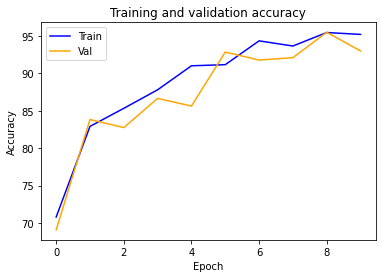

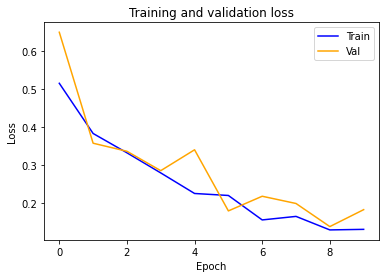

In [ ]:
def plot(train_loss_history,train_acc_history,val_loss_history,val_acc_history):
  acc = train_acc_history
  val_acc = val_acc_history
  loss = train_loss_history
  val_loss = val_loss_history

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(train_loss_history,train_acc_history,val_loss_history,val_acc_history)